<h1>20156025 sungho Park</h1>

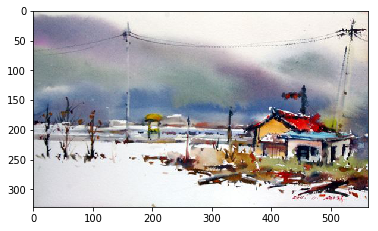

In [2]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import turtle as t

#0. 이미지 불러오기
#im = pilimg.open('image.jpg')
#cropImage = im.crop((32,23,532,373))
#print(cropImage.size)
#pix = np.array(cropImage)

im = pilimg.open('image3.jpg')
pix = np.array(im)

size_row = len(pix)
size_col = len(pix[0,:])
plt.imshow(pix)

In [3]:
#데이터가 어디그룹인지 표시
group_num = np.zeros((size_row,size_col),dtype = 'int') 

In [4]:
#norm 2
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [5]:
#가장 작은 distance를 가지는 centeroid가 무엇인지 찾아주는 func
def min_dst(temp,k,x,y):
    group = 0
    min = temp[0]
    for i in range(k):
        if temp[i] < min:
            min = temp[i] #centeroid[i] 와의 distance가 가장 작다
            group = i
    group_num[x,y] = group  #즉 x번째 데이터는 i 그룹이다..
    return min

In [6]:
def init(centeroid,k):
    for i in range(k):
        for j in range(3):
            centeroid[i][j] = random.randrange(0,255)

In [7]:
# plot Energy
def plotEnergy(energy):
    plt.title('Energy')
    plt.plot(energy,'bo-')
    plt.xlabel('iteration')
    plt.ylabel('energy')
    plt.legend() #범례
    plt.show()

In [8]:
# plot Accuracy
def plotImage(centeroid):
    result = np.zeros((size_row,size_col,3),dtype = 'int')
    for i in range(size_row):
        for j in range(size_col):
            pix[i,j,:] = centeroid[group_num[i][j],:]
    plt.title('Image')
    plt.imshow(pix)

In [9]:
def Kmeans(k):
    temp = np.zeros(k,dtype = 'float')
    min_distance = np.zeros((size_row,size_col),dtype = 'float')
    
    centeroid = np.zeros((k,3),dtype = 'int')
    pre_centeroid = np.zeros((k,3),dtype = 'int')
    iteration = 0
    energy = []
    pix = np.array(im)
    
    #0. initalization
    init(centeroid,k)
    
    #3.이전 centeroid와 현재 centeroid가 같을때까지 반복
    while (not(np.array_equal(pre_centeroid, centeroid))):
        group_count = np.zeros(k,dtype = 'int')
        avg = np.zeros((k,3),dtype = 'int')
        
        pre_centeroid = centeroid
        
        #1. 각 픽셀과 centeroid를 비교 
        #2. => 가장 작은걸로 그룹
        for i in range(size_row):
            for j in range(size_col):
                for x in range(k):
                    temp[x] = distance(pix[i,j,:],centeroid[x,:]) #픽셀과 centeroid의 distance
                min_distance[i,j] = min_dst(temp,k,i,j) #가장 짧은 거리를 구한다(여기서 그룹이 정해짐).
                group_count[group_num[i][j]]+=1 #각 그룹 갯수
                
        energy.append(np.sum(min_distance))
        
        # 각 그룹의 평균값 구하기
        # Sum
        for i in range(size_row):
            for j in range(size_col):
                for l in range(3):
                    avg[group_num[i][j],l] += pix[i,j,l]
        # Divide
        for i in range(k):
            for j in range(3):
                if group_count[i] != 0:
                    avg[i,j] = avg[i,j] / group_count[i]
        centeroid = avg
        
        iteration +=1
        
        
        
    plotEnergy(energy)
    plotImage(centeroid)
    return iteration

<h3>1. K = 3</h3>

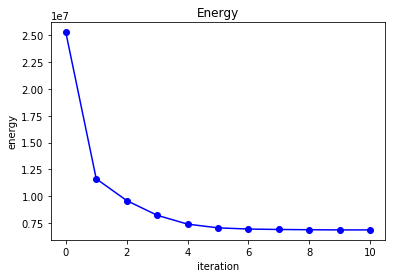

11

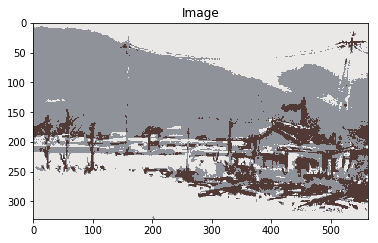

In [10]:
Kmeans(3)

<h3>2. K = 5</h3>

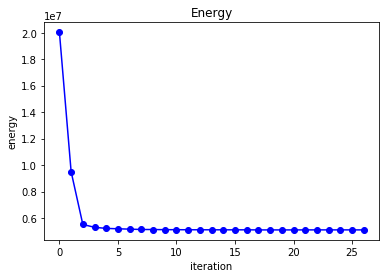

27

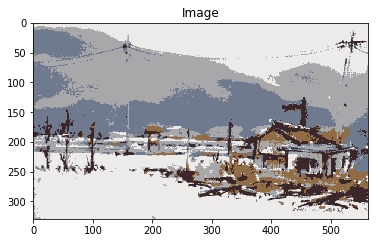

In [10]:
Kmeans(5)

<h3>3. K = 10</h3>

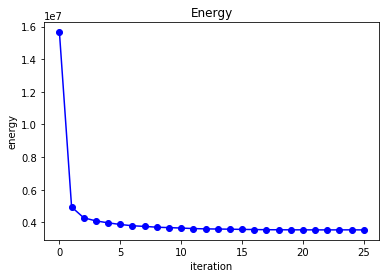

26

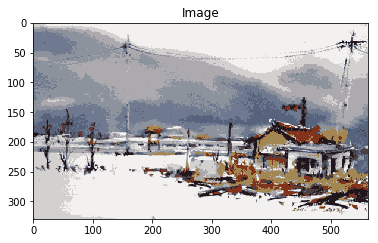

In [11]:
Kmeans(10)

<h3>4. K = 30</h3>

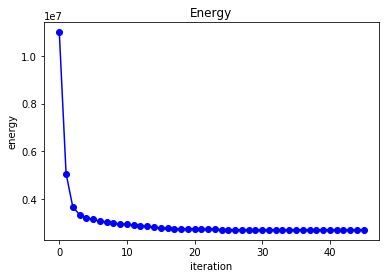

46

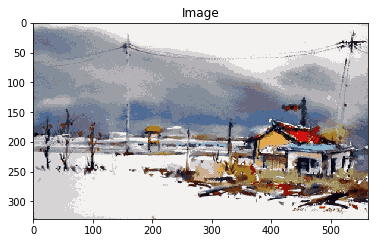

In [12]:
Kmeans(30)